<h2> Plot Wyoming Cloud Radar data

In [1]:
# Load the needed packages
import os
import matplotlib.pyplot as plt
import numpy as np

import awot
import awot
from awot.graph import FlightLevel, RadarVerticalPlot, MicrophysicalVerticalPlot

%matplotlib inline

Supply input data and plotting characteristics

In [5]:
file1 = "WCR.TEST14.20140917.183235_185638.down.nc"
#file = "WCR.TEST14.20140618.200302_201559.up.nc"
wcrf1 = os.path.join("/Users/guy/data/king_air/test2014/wcr", file1)

file = "WCR.OWLES13.20140127.203210_210457.up-down.nc"
wcrf2 = os.path.join("/Users/guy/data/king_air/owles2013/wcr/", file)

start_time = "2014-09-07 18:32:35"
end_time = "2014-09-07 18:56:37"

# Set the project name
Project="TEST14"

#TEST2014
#altmin, altmax = 1500., 8000.

#OWLES2013
altmin, altmax = 0., 3000.

refmin, refmax = -50., 30.
#velmin, velmax = -16., 16. # Nyquist
velmin, velmax = -5., 5. # Nyquist

Read in the radar data

In [3]:
wcr = awot.io.read_wcr2(fname=wcrf2)

height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


Make a vertical plot of reflectivity and velocity fields

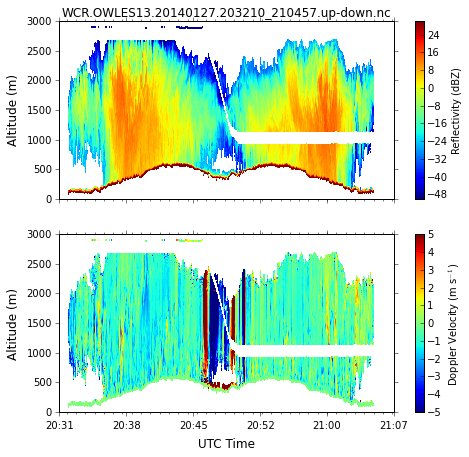

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5,7), sharex=True)


wcr_vp= RadarVerticalPlot(wcr, instrument='wcr')

wcr_vp.contour_timeseries('reflectivity', ax=ax1, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
              vmin=refmin, vmax=refmax,
              cb_label=r'Reflectivity (dBZ)',
              other_min=altmin, other_max=altmax,
              title=file,
              ylab=r'Altitude (m)', ylabFontSize=12)
              
wcr_vp.contour_timeseries('velocity', ax=ax2, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
              vmin=velmin, vmax=velmax,
              cb_label=r'Doppler Velocity (m s$^{-1}$)',
              other_min=altmin, other_max=altmax,
              ylab=r'Altitude (m)', ylabFontSize=12,
              xlab='UTC Time', xlabFontSize=12)